<a href="https://colab.research.google.com/github/kidais-lab/Mad-Libs-Generator/blob/master/CH3_A_linear_classifier_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import tensorflow as tf
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
	with tf.GradientTape() as inner_tape:
		position = 4.9 * time ** 2
	speed = inner_tape.gradient(position, time)
	print('Position=', position)

acceleration = outer_tape.gradient(speed , time)
print('Speed=', speed)
print('Acceleration=', acceleration)

Position= tf.Tensor(0.0, shape=(), dtype=float32)
Speed= tf.Tensor(0.0, shape=(), dtype=float32)
Acceleration= tf.Tensor(9.8, shape=(), dtype=float32)


Generating two classes of random points in a 2D plane  (negative, positive)
Generate Synthetic Data:
   - Generate two classes of points in a 2D plane.
   - Use random distributions with specific covariance matrices and mean values.
   - The covariance matrix describes the shape of the point cloud, and
   - The mean describes its position.

In [40]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers


num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
mean=[0, 3],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)


positive_samples = np.random.multivariate_normal(
mean=[3, 0],
cov=[[1, 0.5],[0.5, 1]],
size=num_samples_per_class)

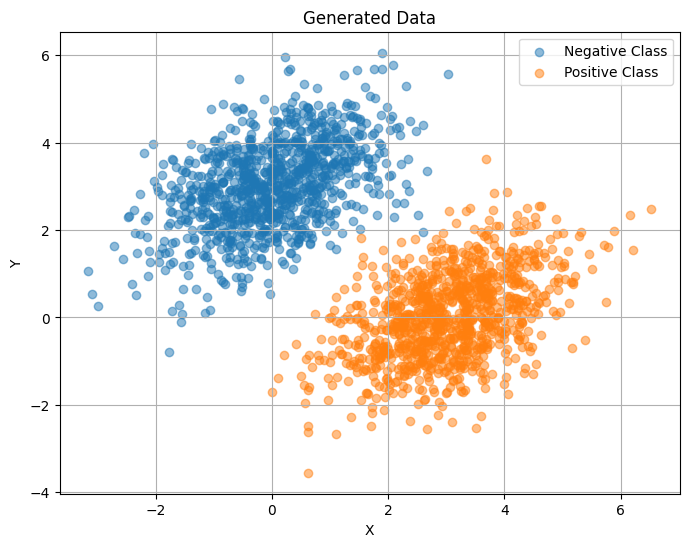

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Code to generate data (same as provided)
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

# Plotting the generated data
plt.figure(figsize=(8, 6))
plt.scatter(negative_samples[:, 0], negative_samples[:, 1], label='Negative Class', alpha=0.5)
plt.scatter(positive_samples[:, 0], positive_samples[:, 1], label='Positive Class', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated Data')
plt.legend()
plt.grid(True)
plt.show()


Stacking the two classes into an array with shape (2000, 2)

In [42]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)


Generating the corresponding targets (0 and 1)


In [43]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 			np.ones((num_samples_per_class, 1), dtype="float32")))

plot our data with Matplotlib.
  Listing 3.16  Plotting the two point classes

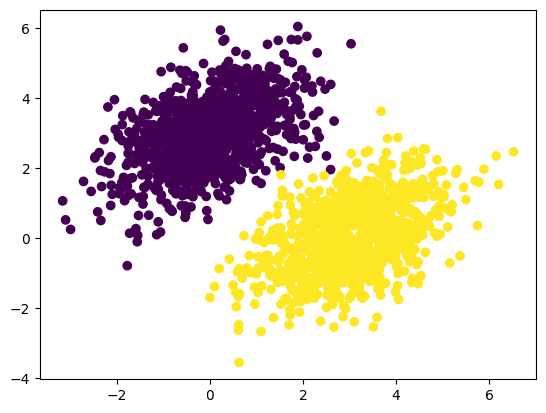

In [44]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

If you want to plot points in green and red, you can directly specify the colors using the c parameter in plt.scatter(). \

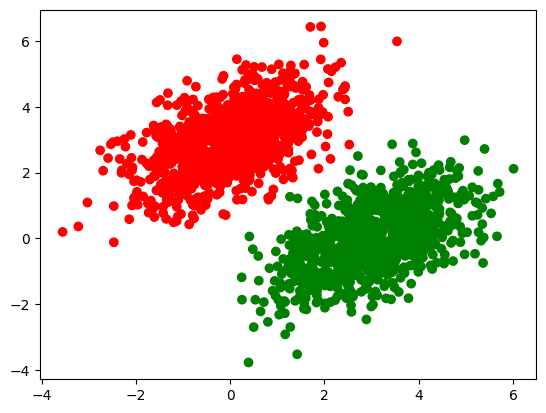

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Code to generate data (same as provided)
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"), 			np.ones((num_samples_per_class, 1), dtype="float32")))

# Assuming inputs and targets are numpy arrays
# Assuming targets contains binary labels (0 for one class, 1 for the other)
colors = ['red' if target == 0 else 'green' for target in targets[:, 0]]

plt.scatter(inputs[:, 0], inputs[:, 1], c=colors)
plt.show()


Linear Classifier Model Initialization
Creating the linear classifier variables
-Initializing variables W and b for the linear classifier model.
-W represents weights, and b represents biases.


In [46]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

Loss Function for Linear Classifier
The mean squared error loss function
Introduction to the mean squared error loss function.
Explanation of how per-sample losses are computed and averaged.

The forward pass function

In [47]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [48]:
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

Training Loop for Linear Classifier
Training loop to update weights and biases of the linear classifier using gradient descent.
Updating weights based on gradients computed using GradientTape.
 The training step function

In [49]:
learning_rate = 0.1

def training_step(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(predictions, targets)
  grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(grad_loss_wrt_W * learning_rate)
  b.assign_sub(grad_loss_wrt_b * learning_rate)
  return loss

In [50]:
# Print the results
print("Weights (W):", W.numpy())
print("Biases (b):", b.numpy())


Weights (W): [[0.19903445]
 [0.02914596]]
Biases (b): [0.]


Batch Training Loop
Description of the batch training loop.
Explanation of why batch training is used instead of mini-batch training.
Listing 3.21  The batch training loop

In [51]:
for step in range(40):
  loss = training_step(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 0.1296
Loss at step 1: 0.0797
Loss at step 2: 0.0744
Loss at step 3: 0.0699
Loss at step 4: 0.0659
Loss at step 5: 0.0622
Loss at step 6: 0.0588
Loss at step 7: 0.0558
Loss at step 8: 0.0530
Loss at step 9: 0.0504
Loss at step 10: 0.0481
Loss at step 11: 0.0459
Loss at step 12: 0.0440
Loss at step 13: 0.0422
Loss at step 14: 0.0406
Loss at step 15: 0.0391
Loss at step 16: 0.0378
Loss at step 17: 0.0365
Loss at step 18: 0.0354
Loss at step 19: 0.0344
Loss at step 20: 0.0334
Loss at step 21: 0.0326
Loss at step 22: 0.0318
Loss at step 23: 0.0311
Loss at step 24: 0.0304
Loss at step 25: 0.0298
Loss at step 26: 0.0293
Loss at step 27: 0.0288
Loss at step 28: 0.0283
Loss at step 29: 0.0279
Loss at step 30: 0.0275
Loss at step 31: 0.0272
Loss at step 32: 0.0269
Loss at step 33: 0.0266
Loss at step 34: 0.0263
Loss at step 35: 0.0261
Loss at step 36: 0.0259
Loss at step 37: 0.0257
Loss at step 38: 0.0255
Loss at step 39: 0.0253


Let’s plot how our linear model classifies the training data points. Because our targets are zeros and ones, a given input point will be classified as “0” if its prediction value is below 0.5, and as “1” if it is above 0.5

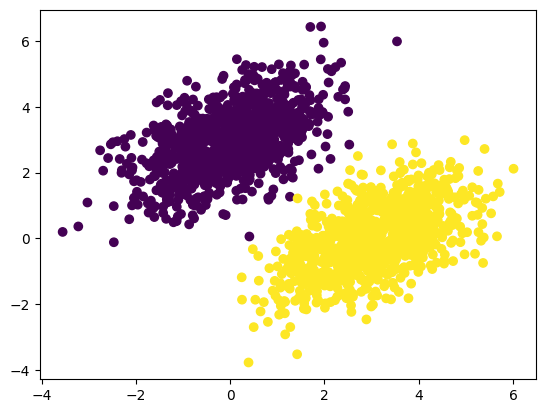

In [52]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

Our model’s predictions on the training inputs: pretty similar to the training targets

Training Progress

Visualization of the training progress.
Display of loss values at each training step.

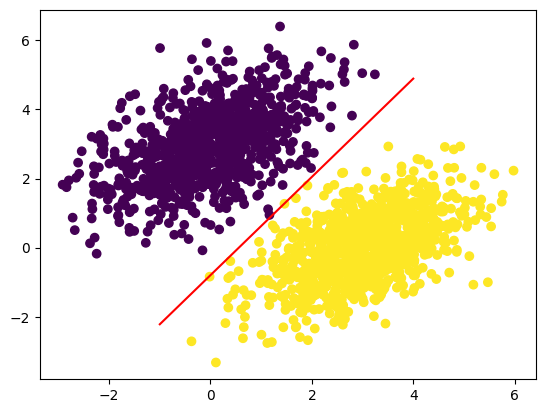

In [ ]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

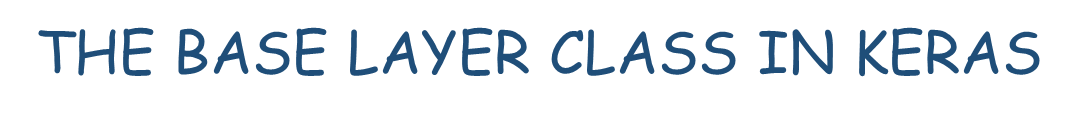

In [ ]:
import tensorflow as tf
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y


In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


Automatic shape inference: Building layers on the fly


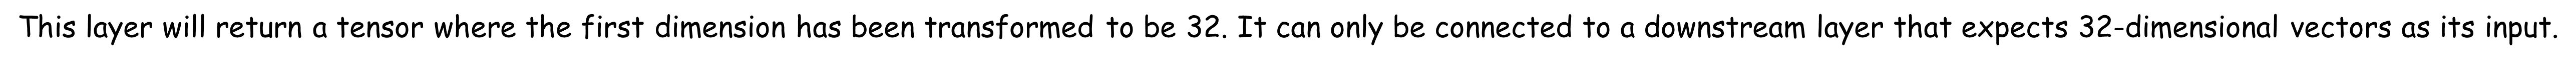

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

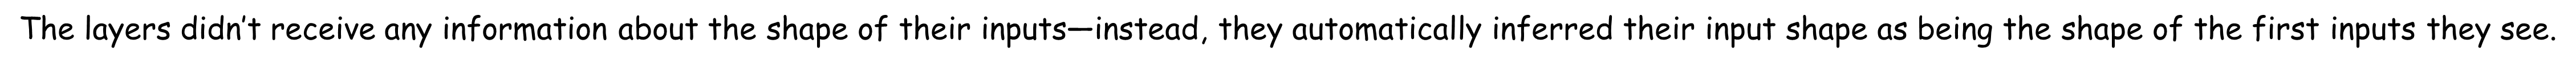

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In the toy version of the Dense layer we implemented in chapter 2 (which we named NaiveDense), we had to pass the layer’s input size explicitly to the constructor in order to be able to create its weights.
That’s not ideal, because it would lead to models that look like this, where each new layer needs to be made aware of the shape of the layer before it:

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])
